In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

import statsmodels.api as sm

In [5]:
consumer_survey = pd.read_excel("H:/frbny-sce-public-microdata-latest.xlsx", skiprows = 1)

In [6]:
dataset.head()

,date,date_dt,userid,tenure,weight,Q1,Q1a,Q1apart2,Q2,Q3,...,Q48,QRA1,QRA2,survey_date,_AGE_CAT,_NUM_CAT,_REGION_CAT,_COMMUTING_ZONE,_EDU_CAT,_HH_INC_CAT
0,202001,2020-01-01,70103231,12,0.818250,4.0,NaN,NaN,3.0,20.0,...,5.0,NaN,NaN,2020-01-23,40 to 60,High,West,218.0,College,Over 100k
1,202001,2020-01-01,70103252,11,2.879998,3.0,NaN,NaN,2.0,1.0,...,2.0,NaN,NaN,2020-01-02,40 to 60,Low,Northeast,203.0,High School,Under 50k
2,202001,2020-01-01,70103258,12,0.549674,4.0,NaN,NaN,4.0,0.0,...,4.0,NaN,NaN,2020-01-07,Over 60,High,South,102.0,College,50k to 100k
3,202001,2020-01-01,70103285,12,0.481746,4.0,NaN,NaN,4.0,10.0,...,1.0,NaN,NaN,2020-01-27,Under 40,High,Midwest,100.0,College,50k to 100k
4,202001,2020-01-01,70103342,11,0.481746,3.0,NaN,NaN,3.0,65.0,...,4.0,NaN,NaN,2020-01-21,Under 40,High,Midwest,58.0,College,50k to 100k


In [11]:
median_vals = consumer_survey.groupby('date_dt')['Q8v2part2'].median().reset_index()
median_vals

,date_dt,Q8v2part2
0,2020-01-01,3.0
1,2020-02-01,3.0
2,2020-03-01,3.0
3,2020-04-01,3.0
4,2020-05-01,3.0
5,2020-06-01,3.0
6,2020-07-01,3.0
7,2020-08-01,3.0
8,2020-09-01,3.0
9,2020-10-01,3.0


<Axes: xlabel='Dates', ylabel='Median Inflation Expectations'>

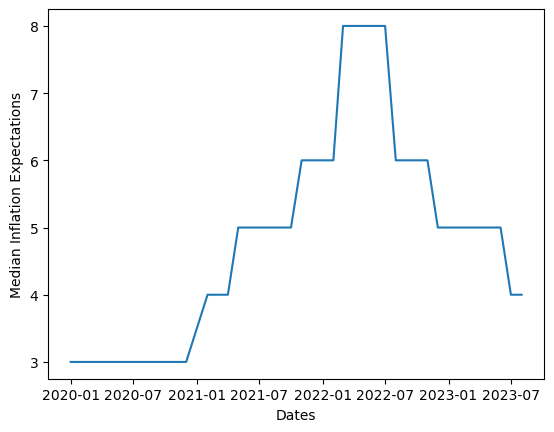

In [12]:
fig, ax1 = plt.subplots()
ax1.set_xlabel ('Dates')
ax1.set_ylabel('Median Inflation Expectations')
sns.lineplot (data = median_vals, x = 'date_dt', y = 'Q8v2part2')

In [14]:
actual_inflation = pd.read_csv('H:/CPIAUCSL.csv')
actual_inflation.head()
actual_inflation['DATE'] = pd.to_datetime (actual_inflation['DATE'])
actual_inflation = actual_inflation.rename (columns={'DATE':'date_dt'})
actual_inflation.head()

In [16]:
merged = pd.merge(median_vals, actual_inflation, on='date_dt', how='inner')
merged.head()

,date_dt,Q8v2part2,CPIAUCSL_PC1
0,2020-01-01,3.0,2.51226
1,2020-02-01,3.0,2.33974
2,2020-03-01,3.0,1.52314
3,2020-04-01,3.0,0.34988
4,2020-05-01,3.0,0.21622


<Axes: xlabel='Dates', ylabel='Inflation'>

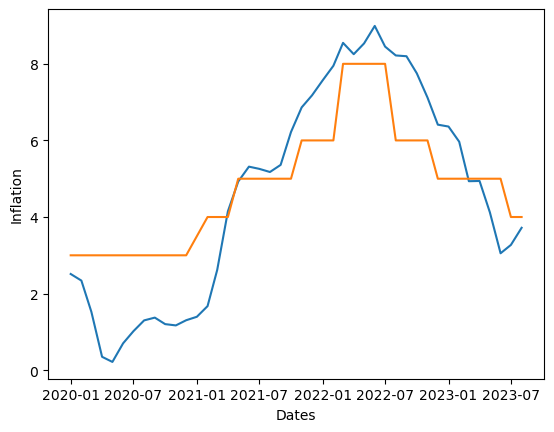

In [17]:
fig, ax1 = plt.subplots()
ax1.set_xlabel ('Dates')
ax1.set_ylabel('Inflation')
sns.lineplot (data = merged, x = 'date_dt', y = 'CPIAUCSL_PC1')
sns.lineplot (data = merged, x = 'date_dt', y = 'Q8v2part2')

<Axes: xlabel='Dates', ylabel='Inflation'>

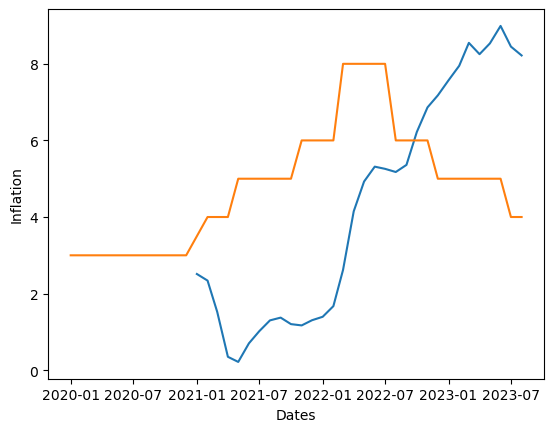

In [18]:
merged['lag']=merged['CPIAUCSL_PC1'].shift(12)
fig, ax1 = plt.subplots()
ax1.set_xlabel ('Dates')
ax1.set_ylabel('Inflation')
sns.lineplot (data = merged, x = 'date_dt', y = 'lag')
sns.lineplot (data = merged, x = 'date_dt', y = 'Q8v2part2')

In [19]:
unemployment = pd.read_csv ('H:/UNRATE.csv')
unemployment.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [21]:
unemployment['DATE'] = pd.datetime(unemployment['DATE'])
unemployment = unemployment.rename (columns = {'DATE': 'date_dt'})
final_merge = pd.merge (merged, unemployment, on = 'date_dt', how = 'inner')
final_merge.head()

,date_dt,Q8v2part2,CPIAUCSL_PC1,lag,UNRATE
0,2020-01-01,3.0,2.51226,NaN,3.6
1,2020-02-01,3.0,2.33974,NaN,3.5
2,2020-03-01,3.0,1.52314,NaN,4.4
3,2020-04-01,3.0,0.34988,NaN,14.8
4,2020-05-01,3.0,0.21622,NaN,13.2


In [60]:
michigan_expectations = pd.read_csv ('H:/MICH.csv')
michigan_expectations['DATE'] = pd.to_datetime(michigan_expectations['DATE'])
michigan_expectations = michigan_expectations.rename (columns = {'DATE': 'date_dt'})

merge1 = pd.merge (michigan_expectations, unemployment, on = 'date_dt', how = 'inner')
merge2 = pd.merge (merge1, actual_inflation, on = 'date_dt', how = 'inner')


pre_1985 = merge2[(merge2['date_dt'] < pd.Timestamp ('1985-01-01T12'))]
post_1985 = merge2[(merge2['date_dt'] >= pd.Timestamp ('1985-01-01T12'))]


,date_dt,MICH,UNRATE,CPIAUCSL_PC1
0,1978-01-01,5.2,6.4,6.81431
1,1978-02-01,6.4,6.3,6.23946
2,1978-03-01,6.3,6.3,6.37584
3,1978-04-01,6.7,6.1,6.50000
4,1978-05-01,6.9,6.0,7.14286


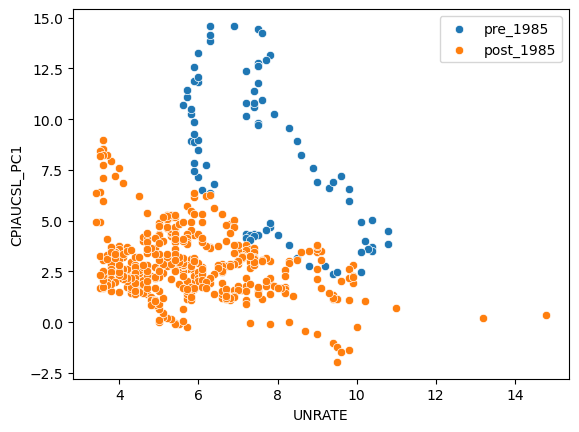

In [31]:
sns.scatterplot (data = pre_1985, x = 'UNRATE', y = 'CPIAUCSL_PC1', label = 'pre_1985')
sns.scatterplot (data = post_1985, x = 'UNRATE', y = 'CPIAUCSL_PC1', label = 'post_1985')
plt.legend()

In [49]:
X = merge2[['MICH', 'UNRATE']]
Y = merge2[['CPIAUCSL_PC1']]
X = sm.add_constant(X)
model1 = sm.OLS (Y, X).fit()
coefficients1 = model1.params
coefficients1

const    -1.354406
MICH      1.566883
UNRATE   -0.109281
dtype: float64

In [45]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CPIAUCSL_PC1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1401.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          3.45e-217
Time:                        13:47:05   Log-Likelihood:                -855.65
No. Observations:                 556   AIC:                             1717.
Df Residuals:                     553   BIC:                             1730.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3544      0.195     -6.950      0.000      -1.737      -0.972
MICH           1.5669      0.030     52.924      0.000       1.509       1.625
UNRATE        -0.1093      0.027     -4.019      0.000      -0.163      -0.056
==============================================================================
Omnibus:                       14.397   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.157
Skew:                          -0.059   Prob(JB):                     7.69e-07
Kurtosis:                       4.096   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X2 = pre_1985[['MICH', 'UNRATE']]
Y2 = pre_1985[['CPIAUCSL_PC1']]
X2 = sm.add_constant(X2)
model2 = sm.OLS (Y2, X2).fit()
coefficients2 = model2.params
coefficients2

const    -3.556507
MICH      1.455992
UNRATE    0.322736
dtype: float64

In [51]:
X3 = post_1985[['MICH', 'UNRATE']]
Y3 = post_1985[['CPIAUCSL_PC1']]
X3 = sm.add_constant(X3)
model3 = sm.OLS (Y3, X3).fit()
coefficients3 = model3.params
coefficients3

const    -1.327921
MICH      1.758661
UNRATE   -0.229269
dtype: float64

In [56]:
pre_2020 = merge2[(merge2['date_dt'] < pd.Timestamp ('2020-01-01T12'))]
post_2020 = merge2[(merge2['date_dt'] >= pd.Timestamp ('2020-01-01T12'))]

X_train = pre_2020[['MICH', 'UNRATE']]
y_train = pre_2020[['CPIAUCSL_PC1']]

model4 = sm.OLS (y_train, X_train).fit()

X_test = post_2020[['MICH', 'UNRATE']]
X_test = sm.add_constant(X_test)

predictions = model.predict(X_test)

post_2020['model_predictions'] = predictions
post_2020.head()


C:\Users\SARDAA1\AppData\Local\Temp\ipykernel_18508\1991746162.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_2020['model_predictions'] = predictions


,date_dt,MICH,UNRATE,CPIAUCSL_PC1,model_predictions
505,2020-02-01,2.4,3.5,2.33974,2.023627
506,2020-03-01,2.2,4.4,1.52314,1.611897
507,2020-04-01,2.1,14.8,0.34988,0.318682
508,2020-05-01,3.2,13.2,0.21622,2.217103
509,2020-06-01,3.0,11.0,0.70177,2.144146


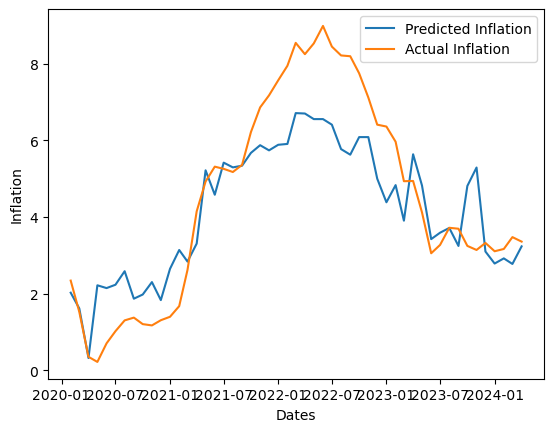

In [58]:
fig, ax1 = plt.subplots()
ax1.set_xlabel ('Dates')
ax1.set_ylabel('Inflation')
sns.lineplot (data = post_2020, x = 'date_dt', y = 'model_predictions', label = 'Predicted Inflation')
sns.lineplot (data = post_2020, x = 'date_dt', y = 'CPIAUCSL_PC1', label = 'Actual Inflation')
plt.legend()

In [59]:
gas_prices = pd.read_csv ('H:/DCOILWTICO (1).csv')
gas_prices.head()

,DATE,DCOILWTICO
0,1986-01-01,22.925455
1,1986-02-01,15.454737
2,1986-03-01,12.612500
3,1986-04-01,12.843636
4,1986-05-01,15.377619


In [61]:
gas_prices['DATE'] = pd.to_datetime (gas_prices['DATE'])
gas_prices = gas_prices.rename (columns={'DATE':'date_dt'})
merge3 = pd.merge(gas_prices, merge2, on = 'date_dt', how = 'inner')
merge3.head()

,date_dt,DCOILWTICO,MICH,UNRATE,CPIAUCSL_PC1
0,1986-01-01,22.925455,2.9,6.7,3.97351
1,1986-02-01,15.454737,2.8,7.2,3.19849
2,1986-03-01,12.612500,2.3,7.2,2.15356
3,1986-04-01,12.843636,2.4,7.1,1.58879
4,1986-05-01,15.377619,2.7,7.2,1.67910


In [66]:
X5 = merge3[['DCOILWTICO']]
Y5 = merge3[['MICH']]
X5 = sm.add_constant(X5)
model5 = sm.OLS(Y5, X5).fit()
predictions = model5.predict (X5)
merge3['residual_expectations'] = merge3['MICH'] - predictions

In [67]:
X6 = merge3[['DCOILWTICO']]
Y6 = merge3[['CPIAUCSL_PC1']]
X6 = sm.add_constant(X6)
model6 = sm.OLS(Y6, X6).fit()
predictions = model6.predict (X6)
merge3['residual_inflation'] = merge3['CPIAUCSL_PC1'] - predictions
merge3.head()

,date_dt,DCOILWTICO,MICH,UNRATE,CPIAUCSL_PC1,residual_predictions,residual_predictions_inflation,predictions,residual_expectations,residual_inflation
0,1986-01-01,22.925455,2.9,6.7,3.97351,0.007157,1.311386,-0.181127,0.007157,1.311386
1,1986-02-01,15.454737,2.8,7.2,3.19849,-0.026061,0.577026,-0.350809,-0.026061,0.577026
2,1986-03-01,12.612500,2.3,7.2,2.15356,-0.500654,-0.452435,-1.277817,-0.500654,-0.452435
3,1986-04-01,12.843636,2.4,7.1,1.58879,-0.402720,-1.018463,-1.065566,-0.402720,-1.018463
4,1986-05-01,15.377619,2.7,7.2,1.67910,-0.125372,-0.941945,-0.544789,-0.125372,-0.941945


In [68]:
X7 = merge3[['residual_expectations', 'UNRATE']]
Y7 = merge3[['residual_inflation']]
X7 = sm.add_constant(X7)
model7 = sm.OLS(Y7, X7).fit()
predictions = model7.predict (X7)
merge3['predictions'] = predictions


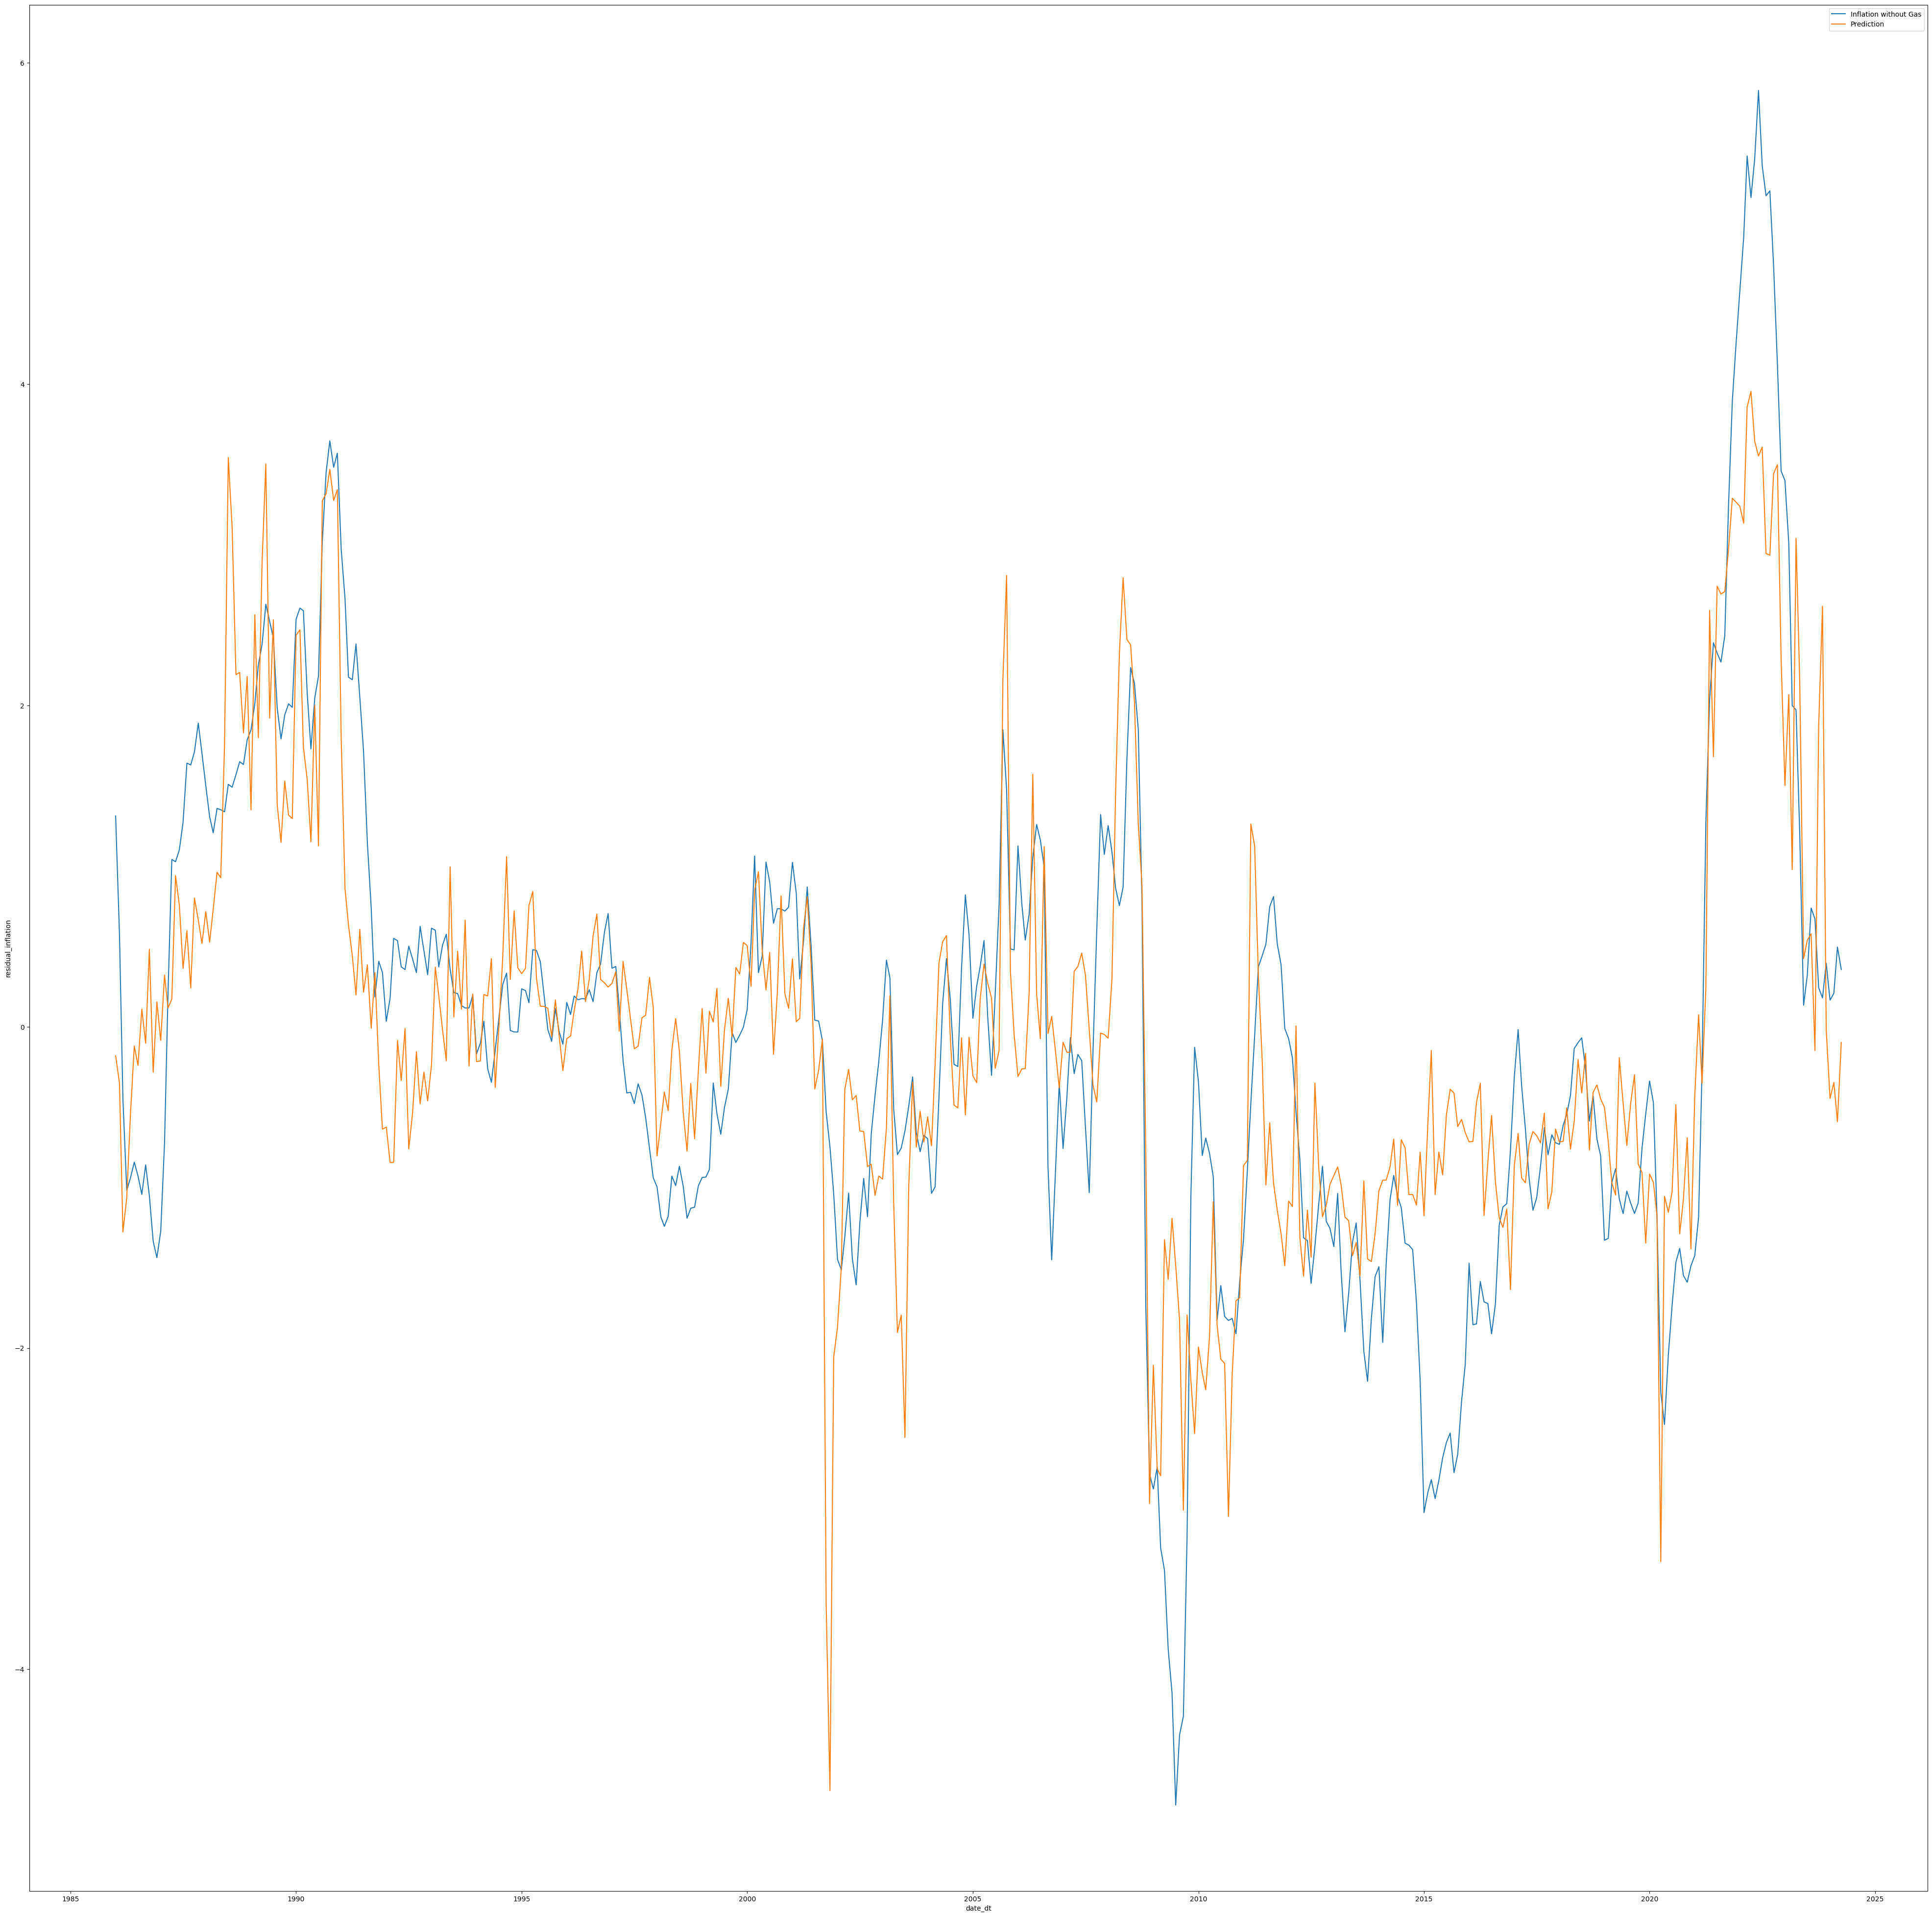

In [75]:
fig = plt.figure(figsize=(50, 50))
'''fig, ax1 = plt.subplots()
ax1.set_xlabel ('Dates')
ax1.set_ylabel('Inflation')'''
sns.lineplot (data = merge3, x = 'date_dt', y = 'residual_inflation', label = 'Inflation without Gas')
sns.lineplot (data = merge3, x = 'date_dt', y = 'predictions', label = 'Prediction')
plt.legend()
